---

# Introduction Étude de marché

Le client, le Domaine des Croix, cherche à se lancer sur le marché américain . Il souhaite donc définir le prix de ses bouteilles de vin pour être compétitif sur le marché américain. Il a récupéré un jeu de données de 130k bouteilles de vin, avec les cépages, les pays et région de production, les millésimes (c'est-à-dire les années de production), ainsi que des notes ("points") et descriptifs d'oenologues (les spécialistes du vin), et le prix moyen en dollars de toutes ces bouteilles sur le marché américain.

L'objectif sera de faire une présentation de l'analyse du marché, et du prix que vous conseillez de fixer pour les vins du client. Le client n'est pas data analyst, mais souhaiterait comprendre la démarche. Il faudra donc s'attacher à expliquer comment les prix ont été fixés, sans rentrer dans un trop grand niveau technique, autrement dit : vulgariser.

## Récupération du csv dans un dataframe

In [ ]:
import pandas as pd

In [ ]:
link = "https://github.com/peggia/wine-case-study/raw/refs/heads/main/data/wine.zip"
df = pd.read_csv(link)

df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2019 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,20.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,18.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2019 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,18.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2019 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Nettoyage des données

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129957 entries, 0 to 129956
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129894 non-null  object 
 1   description            129957 non-null  object 
 2   designation            92497 non-null   object 
 3   points                 129957 non-null  int64  
 4   price                  120964 non-null  float64
 5   province               129894 non-null  object 
 6   region_1               108710 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103713 non-null  object 
 9   taster_twitter_handle  98744 non-null   object 
 10  title                  129957 non-null  object 
 11  variety                129956 non-null  object 
 12  winery                 129957 non-null  object 
 13  decile_rank            129957 non-null  int64  
dtypes: float64(1), int64(2), object(11)


In [ ]:
df.isna().sum()

,0
country,63
description,0
designation,37460
points,0
price,8993
province,63
region_1,21247
region_2,79446
taster_name,26244
taster_twitter_handle,31213


In [ ]:
mask = df['country'].isna() & df['province'].isna()
len(df[mask])

63

Le pays et la région ne sont pas renseignés pour 63 lignes, on pourrait les supprimer, même si c'est pas très important.

Par contre, il y a 8993 lignes pour lesquelles nous n'avons pas le prix... comme on cherche à faire des recommandations de prix en fonction de l'existant, on peut les supprimer. De plus elles representent seulement 6.9% sur le total de 129957 lignes de données.


In [ ]:
# Identify the duplicated rows based on all columns
duplicates = df.duplicated()

# Count the number of duplicated rows
dup_count = duplicates.sum()
dup_count

9982

Il y a 9982 doublons. On va le supprimer et ne garder la première occurrence

In [ ]:
df =df.drop_duplicates()
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119975 entries, 0 to 119974
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119916 non-null  object 
 1   description            119975 non-null  object 
 2   designation            85434 non-null   object 
 3   points                 119975 non-null  int64  
 4   price                  111583 non-null  float64
 5   province               119916 non-null  object 
 6   region_1               100415 non-null  object 
 7   region_2               46769 non-null   object 
 8   taster_name            95058 non-null   object 
 9   taster_twitter_handle  90529 non-null   object 
 10  title                  119975 non-null  object 
 11  variety                119974 non-null  object 
 12  winery                 119975 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 11.9+ MB


In [ ]:
df.isna().sum()

,0
country,59
description,0
designation,34541
points,0
price,8392
province,59
region_1,19560
region_2,73206
taster_name,24917
taster_twitter_handle,29446


On pourrait garder les na (lignes sans prix) car ca pourrait servir pour la cartoraphie des vins, même si on ne s'en sert pas pour les recommandations de prix, mais ils ne representent qu'environ 6%, donc on les enlève

In [ ]:
#on garde les lignes si  le pays est pas renseigné
df = df[df['country'].notna()]
#on garde les lignes si  le prix est pas renseigné
df= df[df['price'].notna()].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111528 entries, 0 to 111527
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                111528 non-null  object 
 1   description            111528 non-null  object 
 2   designation            79481 non-null   object 
 3   points                 111528 non-null  int64  
 4   price                  111528 non-null  float64
 5   province               111528 non-null  object 
 6   region_1               93570 non-null   object 
 7   region_2               46568 non-null   object 
 8   taster_name            88255 non-null   object 
 9   taster_twitter_handle  83772 non-null   object 
 10  title                  111528 non-null  object 
 11  variety                111527 non-null  object 
 12  winery                 111528 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 11.1+ MB


# Analyse exploratoire des données

### Répartition du nombre de vins par pays


In [ ]:
df['country'].unique()

array(['Portugal', 'US', 'Spain', 'Italy', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', 'Turkey', 'Czech Republic', 'Slovenia', 'Luxembourg',
       'Croatia', 'Georgia', 'Uruguay', 'England', 'Lebanon', 'Serbia',
       'Brazil', 'Moldova', 'Morocco', 'Peru', 'India', 'Bulgaria',
       'Cyprus', 'Armenia', 'Switzerland', 'Bosnia and Herzegovina',
       'Ukraine', 'Slovakia', 'Macedonia', 'China'], dtype=object)

In [ ]:
print('Nombre de pays : ', len(df['country'].unique()))

Nombre de pays :  42


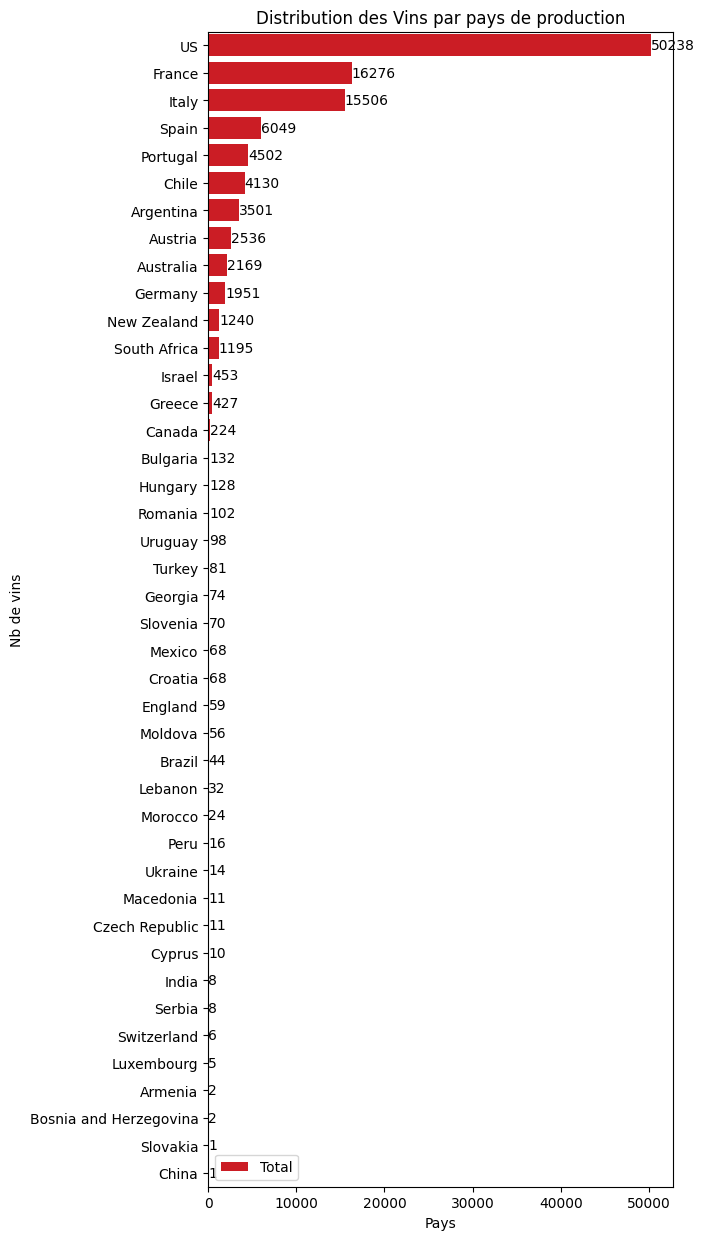

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_pays= df.groupby("country", as_index=False).agg(nombre_vins=("title","count"))
df_pays= df_pays.sort_values("nombre_vins", ascending=False).reset_index(drop=True)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total
sns.set_color_codes("bright")
ax = sns.barplot(x="nombre_vins", y="country", data=df_pays,
            label="Total", color="r")
for i in ax.containers:
    ax.bar_label(i,)

plt.title("Distribution des Vins par pays de production")
plt.xlabel('Pays')
plt.ylabel('Nb de vins')

plt.show()

In [ ]:
len(df_pays)

42

In [ ]:
df_pays

,country,nombre_vins
0,US,50238
1,France,16276
2,Italy,15506
3,Spain,6049
4,Portugal,4502
5,Chile,4130
6,Argentina,3501
7,Austria,2536
8,Australia,2169
9,Germany,1951


On pourrait prendre juste le TOP10 des pays ce qui correspond  au dernier quartile

In [ ]:
df_pays.describe()

,nombre_vins
count,42.000000
mean,2655.428571
std,8319.321132
min,1.000000
25%,11.750000
50%,72.000000
75%,1228.750000
max,50238.000000


La moitié des pays producteurs vendent moins de 72 vins différents aux US. La France se trouve en deuxième position avec 16276 vins différents, après le marché local US (50238 vins). L'Italie est en 3eme position (15516)

### Classement des Pays par notes max


In [ ]:
df.groupby("country", as_index=False).agg(
                      notes_max=("points","max"),
                      moyenne_notes= ("points","mean")
                      ).sort_values("notes_max", ascending=False).reset_index(drop=True)


,country,notes_max,moyenne_notes
0,Italy,100,88.633110
1,France,100,88.745208
2,Australia,100,88.573997
3,US,100,88.557984
4,Portugal,100,88.329853
5,Spain,98,87.238552
6,Germany,98,89.878011
7,Hungary,97,89.265625
8,Argentina,97,86.648957
9,Austria,97,90.219637


La France fait partie du TOP 5 des pays avec des vins ayant obtenu la note max 100/100

### Classement des Pays par moyenne des notes

In [ ]:
df.groupby("country", as_index=False).agg(
                      notes_max=("points","max"),
                      moyenne_notes= ("points","mean")
                      ).sort_values("moyenne_notes", ascending=False).reset_index(drop=True)

,country,notes_max,moyenne_notes
0,England,95,91.762712
1,India,93,90.250000
2,Austria,97,90.219637
3,Germany,98,89.878011
4,Canada,94,89.312500
5,Hungary,97,89.265625
6,China,89,89.000000
7,Luxembourg,90,88.800000
8,France,100,88.745208
9,Morocco,93,88.708333


Par contre, en termes de moyenne des notes, la France se trouve en 8ème position avec une moyenne de 88/100

### Moyennes de notes et notes max par cépage


In [ ]:
print("Nb de cépages : ", len(df['variety'].unique()))

Nb de cépages :  692


In [ ]:
df_cepages = df.groupby("variety", as_index=False).agg(
                      moyenne_notes= ("points","mean")
                      ).sort_values("moyenne_notes", ascending=False).reset_index(drop=True)
df_cepages.head(20)

,variety,moyenne_notes
0,Terrantez,95.000000
1,Gelber Traminer,95.000000
2,Tinta del Pais,95.000000
3,Bual,94.333333
4,Sercial,94.000000
5,Riesling-Chardonnay,94.000000
6,Roviello,93.000000
7,Ramisco,93.000000
8,Blauburgunder,93.000000
9,Garnacha-Cariñena,93.000000


In [ ]:
df_cepages[df_cepages['variety']== 'Pinot Noir']

,variety,moyenne_notes
134,Pinot Noir,89.422446


Les vins à base de Pinot noir (tous pays confondus) ont une note moyenne de 89.42

In [ ]:
df_cepages = df.groupby("variety", as_index=False).agg(
                      moyenne_notes= ("points","mean"),
                      note_max= ("points","max")
                      ).sort_values("note_max", ascending=False).reset_index(drop=True)
df_cepages.head(15)

,variety,moyenne_notes,note_max
0,Sangiovese Grosso,90.849541,100
1,Bordeaux-style White Blend,87.925984,100
2,Muscat,88.776860,100
3,Chardonnay,88.282392,100
4,Champagne Blend,89.682540,100
5,Sangiovese,88.608414,100
6,Portuguese Red,88.899901,100
7,Port,90.092077,100
8,Cabernet Sauvignon,88.619564,100
9,Syrah,89.306247,100


In [ ]:
df_cepages.describe()

,moyenne_notes,note_max
count,691.000000,691.000000
mean,87.830619,90.797395
std,2.030483,3.540580
min,80.500000,81.000000
25%,86.575238,88.000000
50%,87.925926,91.000000
75%,89.000000,93.000000
max,95.000000,100.000000


* La note moyenne minimale par cépage est de 81/100
* la note moyenne max est de 100/100.
* Seulement 25 % des cépages ont une note max supérieure à 93/100 => Le Domaine des Croix serait donc  dans ce top 25% avec une note de 94/100


### Répartition des Notes (points) par décile

In [ ]:

# adding Decile_rank column to the DataFrame
df['decile_rank'] = pd.qcut(df['points'], q=10, duplicates='drop',labels=False) + 1
df.head(1)


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,decile_rank
0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,20.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,3


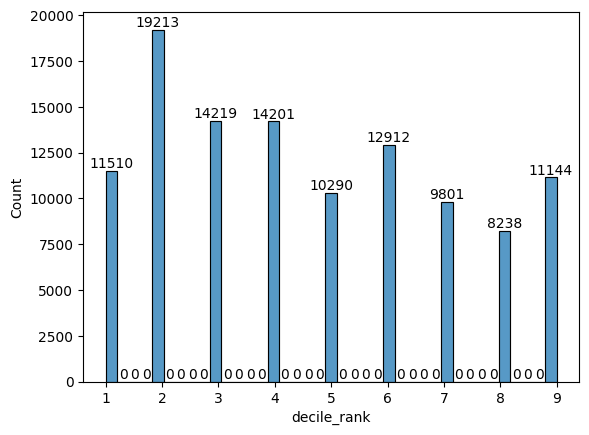

In [ ]:

ax = sns.histplot(data= df,x='decile_rank')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

Seul environ 10% des vins se trouvent dans le 9ème decile avec les notes les plus hautes (80-90/100)

### Colonne millesime

In [ ]:
import re
import numpy as np
#fonction pour  recupérer le millesime à partir du nom d'un vin
def get_millesime(name):
   # Trouver toutes les années dans le titre
    years = re.findall(r'\b\d{4}\b', name)  # Utiliser \b pour éviter les espaces

    # Convertir les années en entiers
    years = [int(year) for year in years]

    if years:
        # Filtrer les années pour ne garder que celles qui sont <= 2023
        valid_years = [year for year in years if year <= 2023]

        if valid_years:
            # Retourner l'année maximum valide
            return str(max(valid_years))

    return 'Non millésimé'  # Retourner 'Non millésimé' si pas d'année valide

print(get_millesime('Domaine 2345 2017 des Croix Corton Grèves'))

df['millesime'] = df['title'].apply(get_millesime)
df.head()

2017


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,decile_rank,millesime
0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,20.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,3,2017
1,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,18.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2019 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,3,2019
2,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,18.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2019 Reserve Late Harvest Riesling ...,Riesling,St. Julian,3,2019
3,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,3,2018
4,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,20.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2017 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,3,2017


In [ ]:
(df['millesime']== 'Non millésimé').sum()

3823

In [ ]:
mask = df['millesime'] != 'Non millésimé'
df['millesime'][mask].astype(int).min()

1609

### Vins Français aux Etat-Unis

#### Répartition des Vins français par région (Province)

In [ ]:

df_fr = df[df['country']== 'France'].reset_index(drop=True)
df_fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16276 entries, 0 to 16275
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                16276 non-null  object 
 1   description            16276 non-null  object 
 2   designation            10828 non-null  object 
 3   points                 16276 non-null  int64  
 4   price                  16276 non-null  float64
 5   province               16276 non-null  object 
 6   region_1               16213 non-null  object 
 7   region_2               0 non-null      object 
 8   taster_name            16031 non-null  object 
 9   taster_twitter_handle  16031 non-null  object 
 10  title                  16276 non-null  object 
 11  variety                16276 non-null  object 
 12  winery                 16276 non-null  object 
 13  decile_rank            16276 non-null  int64  
 14  millesime              16276 non-null  object 
dtypes:

In [ ]:
df_fr.groupby("province").agg(nombre_vins=("title","count")).sort_values("nombre_vins", ascending=False)

,nombre_vins
province,
Bordeaux,3692
Burgundy,2862
Alsace,1945
Loire Valley,1454
Champagne,1284
Southwest France,1225
Provence,1017
Rhône Valley,947
Beaujolais,758


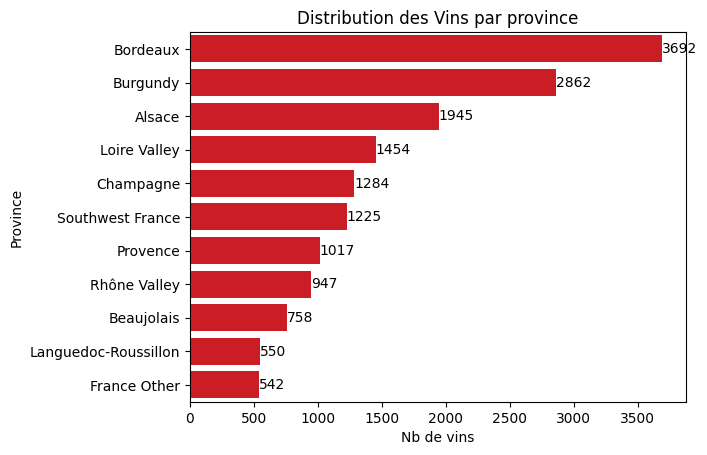

In [ ]:

df_fr_province= df_fr.groupby("province").agg(nombre_vins=("title","count"))
df_fr_province= df_fr_province.sort_values("nombre_vins", ascending=False)

sns.set_color_codes("bright")
ax = sns.barplot( y="province", x="nombre_vins", data=df_fr_province, color="r")
for i in ax.containers:
    ax.bar_label(i,)

plt.title("Distribution des Vins par province")
plt.ylabel('Province')
plt.xlabel('Nb de vins')

plt.show()

Après Bordeaux, la Bourgogne est la 2eme région française la plus représentée aux Etat-Unis, avec un total de 2862 vins différents.

#### Classement des vins français les plus chers, par région (province)

In [ ]:
df_fr_province = df_fr.groupby("province").agg(
    nombre_vins=("title","count"),
    notes_max=("points","max"),
    moyenne_notes= ("points","mean"),
    prix_max = ("price","max"),
    prix_moyen = ("price","mean"),
    ).sort_values("prix_max", ascending=False)
df_fr_province

,nombre_vins,notes_max,moyenne_notes,prix_max,prix_moyen
province,,,,,
Burgundy,2862,99,89.671209,1902.0,57.080363
Bordeaux,3692,100,87.961809,1457.0,35.964247
Champagne,1284,100,90.331776,965.0,114.341121
Languedoc-Roussillon,550,95,87.038182,516.0,25.612727
Rhône Valley,947,98,89.009504,354.0,39.798310
Loire Valley,1454,99,88.480743,312.0,27.695323
Alsace,1945,97,89.632391,254.0,33.174807
Southwest France,1225,96,88.674286,223.0,28.739592
France Other,542,94,86.238007,103.0,21.130996


In [ ]:
display(df_fr.loc[df_fr['price'].idxmax()])


,14429
country,France
description,"A wonderfully complete wine, with all the elem..."
designation,NaN
points,96
price,1902.0
province,Burgundy
region_1,La Romanée
region_2,NaN
taster_name,Roger Voss
taster_twitter_handle,@vossroger


La Bourgogne est la région avec le  vin français le plus cher (1902$), un Bourgogne La Romanée, millésime 2011.


#### Classement des vins français par prix moyen, par région (province)

In [ ]:
df_fr_province = df_fr.groupby("province").agg(
    nombre_vins=("title","count"),
    notes_max=("points","max"),
    moyenne_notes= ("points","mean"),
    prix_max = ("price","max"),
    prix_moyen = ("price","mean"),
    ).sort_values("prix_moyen", ascending=False)
df_fr_province

,nombre_vins,notes_max,moyenne_notes,prix_max,prix_moyen
province,,,,,
Champagne,1284,100,90.331776,965.0,114.341121
Burgundy,2862,99,89.671209,1902.0,57.080363
Rhône Valley,947,98,89.009504,354.0,39.798310
Bordeaux,3692,100,87.961809,1457.0,35.964247
Alsace,1945,97,89.632391,254.0,33.174807
Southwest France,1225,96,88.674286,223.0,28.739592
Loire Valley,1454,99,88.480743,312.0,27.695323
Languedoc-Roussillon,550,95,87.038182,516.0,25.612727
Provence,1017,95,88.241888,100.0,24.124877


La bourgogne est en deuxième position du classement avec un prix moyen de 57$

#### Régions françaises avec les vins les mieux notés

In [ ]:
df_fr.groupby("province", as_index=False).agg(
                      notes_max=("points","max"),
                      moyenne_notes= ("points","mean")
                      ).sort_values("notes_max", ascending=False)


,province,notes_max,moyenne_notes
2,Bordeaux,100,87.961809
4,Champagne,100,90.331776
3,Burgundy,99,89.671209
7,Loire Valley,99,88.480743
9,Rhône Valley,98,89.009504
0,Alsace,97,89.632391
10,Southwest France,96,88.674286
6,Languedoc-Roussillon,95,87.038182
8,Provence,95,88.241888
1,Beaujolais,94,88.098945


In [ ]:
df_fr.groupby("province", as_index=False).agg(
                      notes_max=("points","max"),
                      moyenne_notes= ("points","mean")
                      ).sort_values("moyenne_notes", ascending=False)


,province,notes_max,moyenne_notes
4,Champagne,100,90.331776
3,Burgundy,99,89.671209
0,Alsace,97,89.632391
9,Rhône Valley,98,89.009504
10,Southwest France,96,88.674286
7,Loire Valley,99,88.480743
8,Provence,95,88.241888
1,Beaujolais,94,88.098945
2,Bordeaux,100,87.961809
6,Languedoc-Roussillon,95,87.038182


La Bourgogne est en 3eme position avec des notes max de 99/100.
La Bourgogne est en 2eme position du classement en termes de notes moyennes avec 89.67/100.


### La région Bourgogne

In [ ]:
df_bourgogne = df_fr.loc[df_fr["province"] == 'Burgundy'].reset_index(drop=True)
df_bourgogne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                2862 non-null   object 
 1   description            2862 non-null   object 
 2   designation            1982 non-null   object 
 3   points                 2862 non-null   int64  
 4   price                  2862 non-null   float64
 5   province               2862 non-null   object 
 6   region_1               2857 non-null   object 
 7   region_2               0 non-null      object 
 8   taster_name            2846 non-null   object 
 9   taster_twitter_handle  2846 non-null   object 
 10  title                  2862 non-null   object 
 11  variety                2862 non-null   object 
 12  winery                 2862 non-null   object 
 13  decile_rank            2862 non-null   int64  
 14  millesime              2862 non-null   object 
dtypes: f

In [ ]:
df_bourgogne.head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,decile_rank,millesime
0,France,"From the warm 2019 vintage, this is a soft and...",NaN,86,18.0,Burgundy,Chablis,NaN,Roger Voss,@vossroger,Simonnet-Febvre 2021 Chablis,Chardonnay,Simonnet-Febvre,2,2021
1,France,"This soft, rounded wine is ripe with generous ...",NaN,86,15.0,Burgundy,Mâcon-Milly Lamartine,NaN,Roger Voss,@vossroger,Vignerons des Terres Secrètes 2021 Mâcon-Mill...,Chardonnay,Vignerons des Terres Secrètes,2,2021
2,France,The impact of 50-year old vines is seen in the...,Les Vénérables Vieilles Vignes,88,37.0,Burgundy,Chablis,NaN,Roger Voss,@vossroger,La Chablisienne 2012 Les Vénérables Vieilles V...,Chardonnay,La Chablisienne,4,2012
3,France,"A citrus-dominated wine, lime and lemon giving...",NaN,87,43.0,Burgundy,St.-Romain,NaN,Roger Voss,@vossroger,Bertrand Ambroise 2012 St.-Romain,Chardonnay,Bertrand Ambroise,3,2012
4,France,"Rich and full in the mouth, packed with red fr...",Les Dames Huguettes,87,33.0,Burgundy,Côte de Nuits-Villages,NaN,Roger Voss,@vossroger,Domaine Bertagna 2015 Les Dames Huguettes (Cô...,Pinot Noir,Domaine Bertagna,3,2015


#### Répartition des cépages de Bourgogne

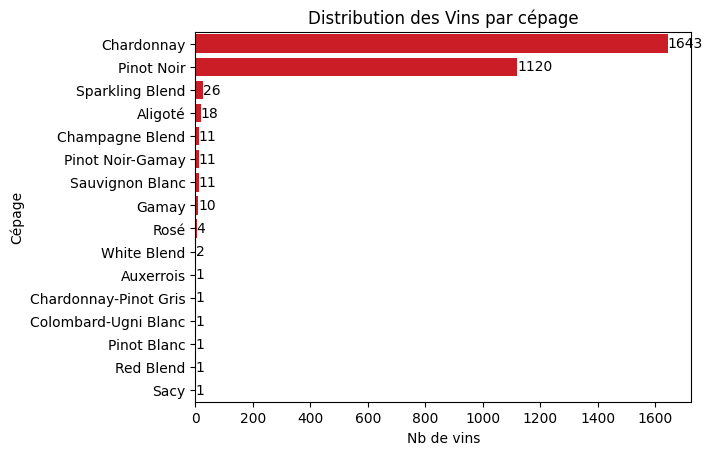

In [ ]:
df_bourgogne_cepage = df_bourgogne.groupby("variety").agg(nombre_vins=("title","count")).sort_values("nombre_vins", ascending=False)
sns.set_color_codes("bright")
ax = sns.barplot( y="variety", x="nombre_vins", data=df_bourgogne_cepage, color="r")
for i in ax.containers:
    ax.bar_label(i,)

plt.title("Distribution des Vins par cépage")
plt.ylabel('Cépage')
plt.xlabel('Nb de vins')

plt.show()

Les deux  cépages de Bourgogne le plus répandus se retrouvent aussi le mieux representés aux Etats-Unis: Le Chardonnay (1643 vins blancs) et le Pinot noir (1120 Vins rouges)

#### Classement des Cépages de Bourgogne par prix moyen, prix max, notes

In [ ]:


df_bourgogne_cepage = df_bourgogne.groupby("variety").agg(
                                                        nombre_vins=("title","count"),
                                                        notes_max=("points","max"),
                                                        moyenne_notes= ("points","mean"),
                                                        prix_max = ("price","max"),
                                                        prix_moyen = ("price","mean")
                                                        )
df_bourgogne_cepage=df_bourgogne_cepage.sort_values("prix_moyen", ascending=False)

df_bourgogne_cepage


,nombre_vins,notes_max,moyenne_notes,prix_max,prix_moyen
variety,,,,,
Pinot Noir,1120,98,90.451786,1902.0,73.925000
Chardonnay,1643,99,89.326841,646.0,47.441266
Sparkling Blend,26,90,87.230769,52.0,41.192308
Champagne Blend,11,92,90.363636,57.0,41.181818
Pinot Blanc,1,89,89.000000,37.0,37.000000
Aligoté,18,88,86.166667,30.0,20.722222
Red Blend,1,87,87.000000,20.0,20.000000
Auxerrois,1,87,87.000000,19.0,19.000000
Sacy,1,87,87.000000,18.0,18.000000


Le cépage Pinot Noir est celui qui a le prix moyen 73.92  et la note moyenne (90.45/100) les plus élévés des vins de Bourgogne. La note max 99/100 est la 2eme après le Chardonnay.

### Le Pinot Noir

#### Distribution par millésime

In [ ]:
df_pinot_noir = df_bourgogne.loc[df_bourgogne['variety']=='Pinot Noir'].reset_index(drop=True)
df_pinot_noir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                1120 non-null   object 
 1   description            1120 non-null   object 
 2   designation            771 non-null    object 
 3   points                 1120 non-null   int64  
 4   price                  1120 non-null   float64
 5   province               1120 non-null   object 
 6   region_1               1120 non-null   object 
 7   region_2               0 non-null      object 
 8   taster_name            1119 non-null   object 
 9   taster_twitter_handle  1119 non-null   object 
 10  title                  1120 non-null   object 
 11  variety                1120 non-null   object 
 12  winery                 1120 non-null   object 
 13  decile_rank            1120 non-null   int64  
 14  millesime              1120 non-null   object 
dtypes: f

In [ ]:
df_pinot_noir['millesime'].unique()

array(['2015', '2019', '2016', '2020', '2017', '2018', '2014', '2011',
       '2021', 'Non millésimé', '2013', '2012', '2022', '2004', '2006',
       '2005', '2010'], dtype=object)

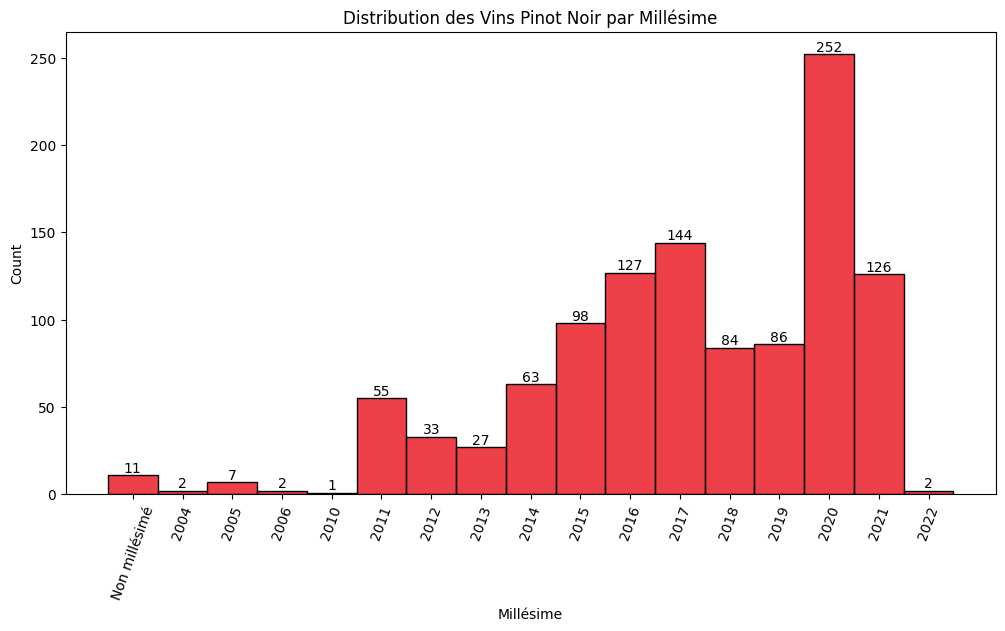

In [ ]:
# Ordonnancement des millésimes
millesimes_order = sorted(df_pinot_noir['millesime'].unique(), key=lambda x: (x != "Non millésimé", int(x) if x.isdigit() else float('inf')))

df_pinot_noir['millesime'] = pd.Categorical(df_pinot_noir['millesime'], categories=millesimes_order, ordered=True)
sns.set_color_codes("bright")
plt.figure(figsize=(12, 6))
ax = sns.histplot(data = df_pinot_noir,x='millesime',color='r' )

for i in ax.containers:
    ax.bar_label(i,)

plt.title("Distribution des Vins Pinot Noir par Millésime")
plt.ylabel('Count')
plt.xlabel('Millésime')
plt.xticks(rotation=70)

plt.show()

#### Prix des Pinot Noirs par millésime

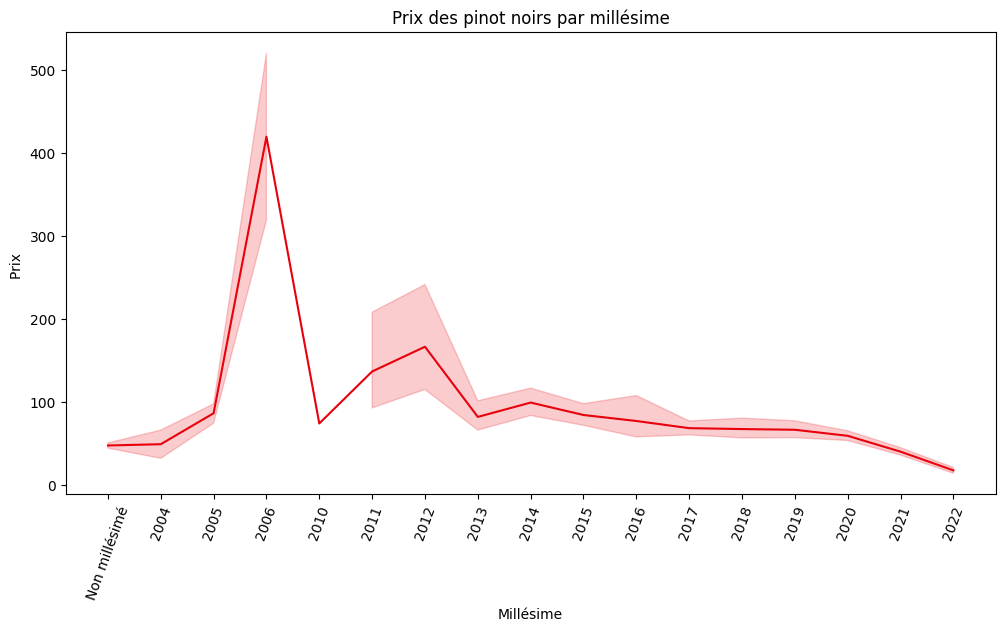

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data = df_pinot_noir,y='price',x='millesime',color="r")#, showfliers = False)
for i in ax.containers:
    ax.bar_label(i,)

plt.title("Prix des pinot noirs par millésime")
plt.ylabel('Prix ')
plt.xlabel('Millésime')
plt.xticks(rotation=70)

plt.show()

#### Prix des pinots noir en fonction de la note




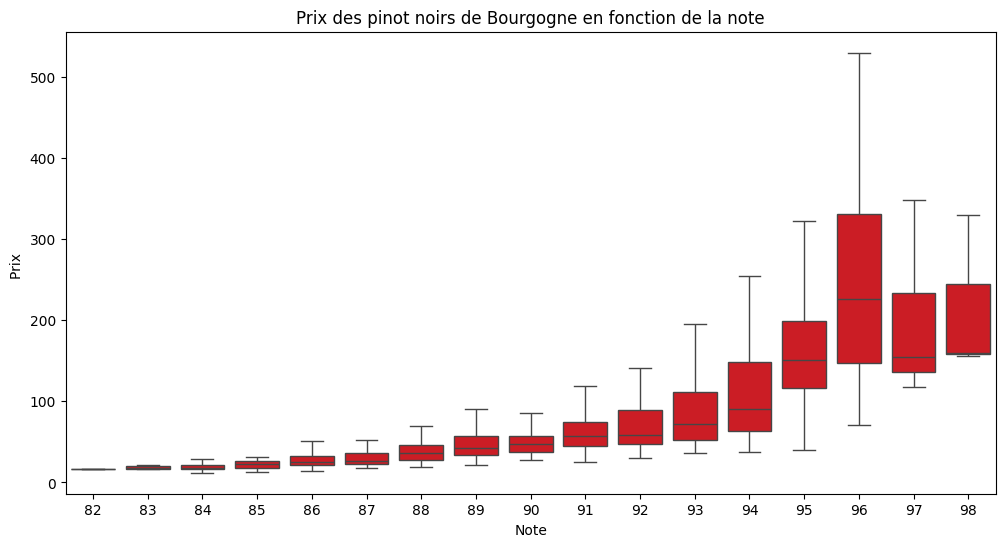

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data = df_pinot_noir,y='price',x='points',color="r", showfliers = False)
# for i in ax.containers:
#     ax.bar_label(i,)

plt.title("Prix des pinot noirs de Bourgogne en fonction de la note")
plt.ylabel('Prix ')
plt.xlabel('Note')

plt.show()

In [ ]:
df_94 = df_pinot_noir.loc[df_pinot_noir['points']== 94]
df_94['price'].describe()


,price
count,104.000000
mean,118.711538
std,105.257121
min,38.000000
25%,63.000000
50%,90.000000
75%,148.500000
max,1008.000000


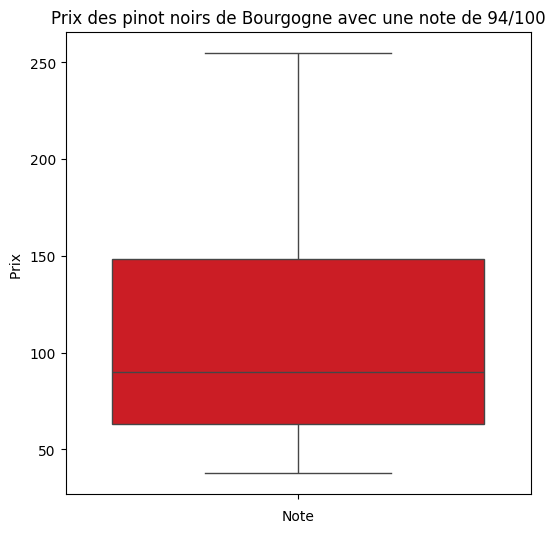

In [ ]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(data = df_94,y='price',color="r", showfliers = False)
# for i in ax.containers:
#     ax.bar_label(i,)

plt.title("Prix des pinot noirs de Bourgogne avec une note de 94/100")
plt.ylabel('Prix ')
plt.xlabel('Note')

plt.show()

Les pinots noirs de Bourgogne avec une note égale à 94/100 (la note du vin du Domaine des Croix) se vendent en moyenne a $118 , mais en fait,  la moitié d'entre eux se vendent à moins de 90 dollars (mediane). Et seulement 25 % d'entre eux se vendent à un prix supérieur à 148.5 dollars

### Dataset client

In [ ]:
link2 = "https://github.com/peggia/wine-case-study/raw/refs/heads/main/data/domaine_des_croix.csv"
df_client = pd.read_csv(link2)

df_client.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,France,Firm and solid with great swathes of black fru...,NaN,94,NaN,Burgundy,Corton Grèves,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Corton Grèves,Pinot Noir,Domaine des Croix


In [ ]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                1 non-null      object 
 1   description            1 non-null      object 
 2   designation            0 non-null      float64
 3   points                 1 non-null      int64  
 4   price                  0 non-null      float64
 5   province               1 non-null      object 
 6   region_1               1 non-null      object 
 7   region_2               0 non-null      float64
 8   taster_name            1 non-null      object 
 9   taster_twitter_handle  1 non-null      object 
 10  title                  1 non-null      object 
 11  variety                1 non-null      object 
 12  winery                 1 non-null      object 
dtypes: float64(3), int64(1), object(9)
memory usage: 232.0+ bytes


### Creation du csv

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111528 entries, 0 to 111527
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                111528 non-null  object 
 1   description            111528 non-null  object 
 2   designation            79481 non-null   object 
 3   points                 111528 non-null  int64  
 4   price                  111528 non-null  float64
 5   province               111528 non-null  object 
 6   region_1               93570 non-null   object 
 7   region_2               46568 non-null   object 
 8   taster_name            88255 non-null   object 
 9   taster_twitter_handle  83772 non-null   object 
 10  title                  111528 non-null  object 
 11  variety                111527 non-null  object 
 12  winery                 111528 non-null  object 
 13  decile_rank            111528 non-null  int64  
 14  millesime              111528 non-nu

In [ ]:
#Extract csv file
from google.colab import files
df.to_csv('df_wine.csv', index=False)
files.download('df_wine.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>